In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split
import os
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import r2_score
from random import seed
from random import randrange
import timeit
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/logs/train_data_ptb.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/logs/test_data_ptb.csv')

In [ ]:
train_data

,Unnamed: 0,gender,age,R HR STD,R HR median,R HR min,R HR max,R HR mean,RMSSD,R amp II std,R amp II min,R amp II min_2,R amp leads I,R amp leads II,R amp lead III,R amp lead aVR,R amp lead aVL,R amp lead aVF,R amp V1,R amp V2,R amp V3,R amp V4,R amp V5,R amp V6,p_offset_std,p_offset_median,p_offset_min,p_offset_max,mean_p_offset,p_onsets_std,p_onsets_median,p_onsets_min,p_onsets_max,mean_p_onsets,ECG_baseline,p_rate_std,p_rate_median,p_rate_min,p_rate_max,mean_p_rate,...,S amp leads I,S amp leads II,S amp lead III,S amp lead aVR,S amp lead aVL,S amp lead aVF,S amp V1,S amp V2,S amp V3,S amp V4,S amp V5,S amp V6,t_rate_std,t_rate_median,t_rate_min,t_rate_max,mean_t_rate,T amp leads I,T amp leads II,T amp lead III,T amp lead aVR,T amp lead aVL,T amp lead aVF,T amp V1,T amp V2,T amp V3,T amp V4,T amp V5,T amp V6,t_offset_std,t_offset_median,t_offset_min,t_offset_max,mean_t_offset,t_onsets_std,t_onsets_median,t_onsets_min,t_onsets_max,mean_t_onsets,Labels
0,0,2.0,-1.0,35.022173,64.242480,62.240664,178.571429,78.968869,7462.634770,0.098937,0.125,0.125,0.578000,0.390364,-0.187636,-0.484000,0.382636,0.101000,-0.329091,-0.155727,0.325091,0.450818,0.495182,0.411000,147.375751,63.626795,57.034221,555.555556,113.872955,89.047138,64.174720,59.171598,361.445783,95.002390,-0.025364,144.267983,63.560463,58.479532,545.454545,113.038421,...,-0.044091,-0.061636,-0.017636,0.052909,-0.013091,-0.039636,-0.180273,-0.342909,-0.205091,-0.140182,-0.043909,0.066545,59.761749,64.936282,62.370062,265.486726,87.351414,0.132909,0.159364,0.026455,-0.146364,0.052909,0.092818,0.070455,0.210636,0.139091,0.140455,0.145818,0.137727,66.537396,65.865579,61.855670,288.461538,89.609104,61.288462,65.077147,60.483871,270.270270,87.847241,['NORM']
1,1,2.0,-1.0,23.360239,50.726668,43.795620,116.731518,60.291780,4180.799504,0.522686,0.119,0.119,0.439333,1.065778,0.626333,-0.752778,-0.093889,0.845667,-1.255778,-2.350111,-1.414333,1.577778,1.404889,1.091667,18.936710,51.457976,44.776119,92.592593,59.821273,21.843615,50.167224,43.478261,103.092784,60.782777,-0.013125,20.829736,49.504950,43.541364,97.402597,60.615808,...,-0.128333,-0.090444,0.037778,0.109444,-0.083000,-0.026222,-0.335778,-0.619444,-0.658444,-0.438444,-0.176222,-0.060333,20.862022,50.505051,43.923865,99.667774,60.616709,0.339125,0.327875,-0.011250,-0.333375,0.175000,0.158125,-0.195375,0.600125,0.651125,0.469750,0.373500,0.295375,20.519107,50.251256,43.352601,97.719870,60.381687,21.792238,48.701299,41.551247,97.719870,60.685624,['NORM']
2,2,2.0,-1.0,27.444595,64.308756,61.475410,138.888889,77.215155,6715.386001,0.260972,-0.129,-0.129,0.739000,0.622545,-0.116364,-0.680545,0.427455,0.253000,-0.464182,-0.295455,0.697273,0.904091,0.731727,0.615909,39.352330,62.827294,57.915058,187.500000,81.766103,37.246120,63.230134,58.479532,171.428571,81.025344,-0.028000,31.974935,63.164894,60.000000,147.058824,79.442134,...,-0.076091,-0.081000,-0.004727,0.078455,-0.035545,-0.042818,-0.010273,-0.029364,-0.120091,-0.078182,-0.045455,-0.022000,41.800335,64.725597,55.248619,201.342282,80.680656,0.170455,0.137818,-0.032545,-0.154182,0.101091,0.052818,-0.104818,0.072364,0.206545,0.154727,0.135545,0.125909,37.137996,66.080578,51.993068,180.722892,79.872997,48.470414,65.011598,53.475936,223.880597,82.741229,['NORM']
3,3,2.0,-1.0,3.937792,76.142622,68.649886,83.102493,75.315293,5687.899616,0.411491,0.445,0.445,0.251692,1.398769,1.147231,-0.825462,-0.448077,1.272769,-0.369231,-0.843154,0.438462,2.604538,1.945462,1.414154,9.133375,75.187970,64.655172,98.360656,76.135691,8.118279,74.441687,67.873303,99.009901,75.675597,-0.093667,9.333440,74.626866,64.935065,102.040816,75.892683,...,-0.312923,-0.325538,-0.012692,0.319231,-0.149846,-0.169077,-0.444769,-0.946385,-1.442692,-1.016308,-0.643538,-0.391692,3.713153,75.187970,68.027211,80.428954,74.695693,0.289000,0.476000,0.187000,-0.382750,0.050750,0.331167,-0.165750,0.549417,0.946250,0.771833,0.576083,0.445250,4.209661,74.074074,69.124424,82.417582,74.724755,3.361471,74.165750,68.181818,78.9473

In [ ]:
print(np.where(test_data.iloc[:,:-1].isna()))
print(test_data.index[np.isinf(test_data.iloc[:,:-1]).any(1)])
#print(test_data.columns.to_series()[np.isinf(test_data.iloc[:,:-1]).any()])

(array([], dtype=int64), array([], dtype=int64))
Int64Index([], dtype='int64')


In [ ]:
count = 0
while len(np.where(test_data.iloc[:,:-1].isna())[1]) != 0:
  try:
    for i,j in enumerate(np.where(test_data.iloc[:,:-1].isna())[0]):
      print("-------")
      print(i)
      print(j)
      print(np.where(test_data.iloc[:,:-1].isna())[1][i])
      print(test_data.iloc[j,np.where(test_data.iloc[:,:-1].isna())[1][i]])
      test_data.iloc[j,np.where(test_data.iloc[:,:-1].isna())[1][i]] = test_data.iloc[:,np.where(test_data.iloc[:,:-1].isna())[1][i]].mean()
    count = count + 1
    print(count)
  except:
    continue

-------
0
1021
86
nan
-------
1
1021
90
nan
-------
2
1021
92
nan
-------
3
1021
94
nan
-------
4
1021
96
nan
-------
5
1021
98
nan
-------
6
1021
100
nan
-------
7
1021
102
nan
-------
8
1021
104
nan
-------
9
1021
108
nan
-------
10
1021
112
nan
-------
11
1021
87
nan
-------
12
1021
103
nan
-------
13
1021
107
nan
-------
14
1021
109
nan
-------
15
1021
86
14.939227040749353
-------
16
1021
87
75.01747710530589
-------
17
1021
90
78.94823922112602
-------
18
1021
103
15.988065782919792
-------
19
1021
104
75.08083513696857
-------
20
1021
107
79.26914674133704
-------
21
1597
108
nan
-------
22
1597
112
nan
-------
23
1597
-------
0
1021
91
nan
-------
1
1021
95
nan
-------
2
1021
99
nan
-------
3
1021
86
14.939227040749351
-------
4
1021
87
75.01747710530589
-------
5
1021
90
78.94823922112602
-------
6
1597
103
nan
-------
7
1597
107
nan
-------
8
1597
86
nan
-------
9
1597
90
nan
-------
10
1597
104
nan
-------
11
1597
108
16.928863236802307
-------
12
1597
109
nan
-------
13
203

In [ ]:
print(np.where(train_data.iloc[:,:-1].isna()))
print(train_data.index[np.isinf(train_data.iloc[:,:-1]).any(1)])
#print(data.columns.to_series()[np.isinf(data.iloc[:,:-1]).any()])

(array([  281,   281,   281,   281,   281,   281,   281,   281,   281,
         281,   281,   281,   281,   281,   281,   281,   281,   281,
         281,   281,   281,   477,   477,   477,   477,   477,   477,
         477,   477,   477,   477,   477,   477,   477,   477,   477,
         477,   477,   477,   477,   477,   477,  3294,  3294,  3294,
        3294,  3294,  3294,  3294,  3294,  3294,  3294,  3294,  3294,
        3294,  3294,  3294,  3294,  3294,  3294,  3294,  3294,  3294,
        3298,  3298,  3298,  3298,  3298,  3298,  3298,  3298,  3298,
        3299,  3299,  3299,  3299,  3299,  3299,  3299,  3299,  3299,
        3546,  3546,  3546,  3546,  3546,  3546,  3546,  3546,  3546,
        3546,  3546,  3546,  3546,  3546,  3546,  3546,  3546,  3546,
        3546,  3546,  3546,  4141,  4141,  4141,  4141,  4141,  4141,
        4141,  4141,  4141,  5882,  5882,  5882,  5882,  5882,  5882,
        5882,  5882,  5882,  5882,  5882,  5882,  5882,  5882,  5882,
        5882,  5882

In [ ]:
train_data.shape

(19608, 114)

In [ ]:
train_data = train_data.dropna()

In [ ]:
train_data.shape

(19564, 114)

In [ ]:
print(np.where(train_data.iloc[:,1:-1].isna()))
print(train_data.index[np.isinf(train_data.iloc[:,1:-1]).any(1)])
#print(data.columns.to_series()[np.isinf(data.iloc[:,1:-1]).any()])

(array([], dtype=int64), array([], dtype=int64))
Int64Index([], dtype='int64')


In [ ]:
train_data

In [ ]:
y_train = train_data['Labels'].str.lstrip("'[").str.rstrip("]'").str.replace("'", "").str.replace(" ", "")

In [ ]:
y_test = test_data['Labels'].str.lstrip("'[").str.rstrip("]'").str.replace("'", "").str.replace(" ", "")

In [ ]:
X_train = train_data.iloc[:,1:-1]

In [ ]:
X_test = test_data.iloc[:,1:-1]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
one_hot = MultiLabelBinarizer()
y_train_ohe=one_hot.fit_transform(y_train.str.split(','))
print(one_hot.classes_)
print("classes: {}".format(y_train_ohe.shape[1]))

['' 'CD' 'HYP' 'MI' 'NORM' 'STTC']
classes: 6


In [ ]:
y_test_ohe = one_hot.transform(y_test.str.split(','))
print("classes: {}".format(y_test_ohe.shape[1]))

classes: 6


In [ ]:
y_test_ohe = np.delete(y_test_ohe, 0, axis=1)

In [ ]:
y_train_ohe = np.delete(y_train_ohe, 0, axis=1)

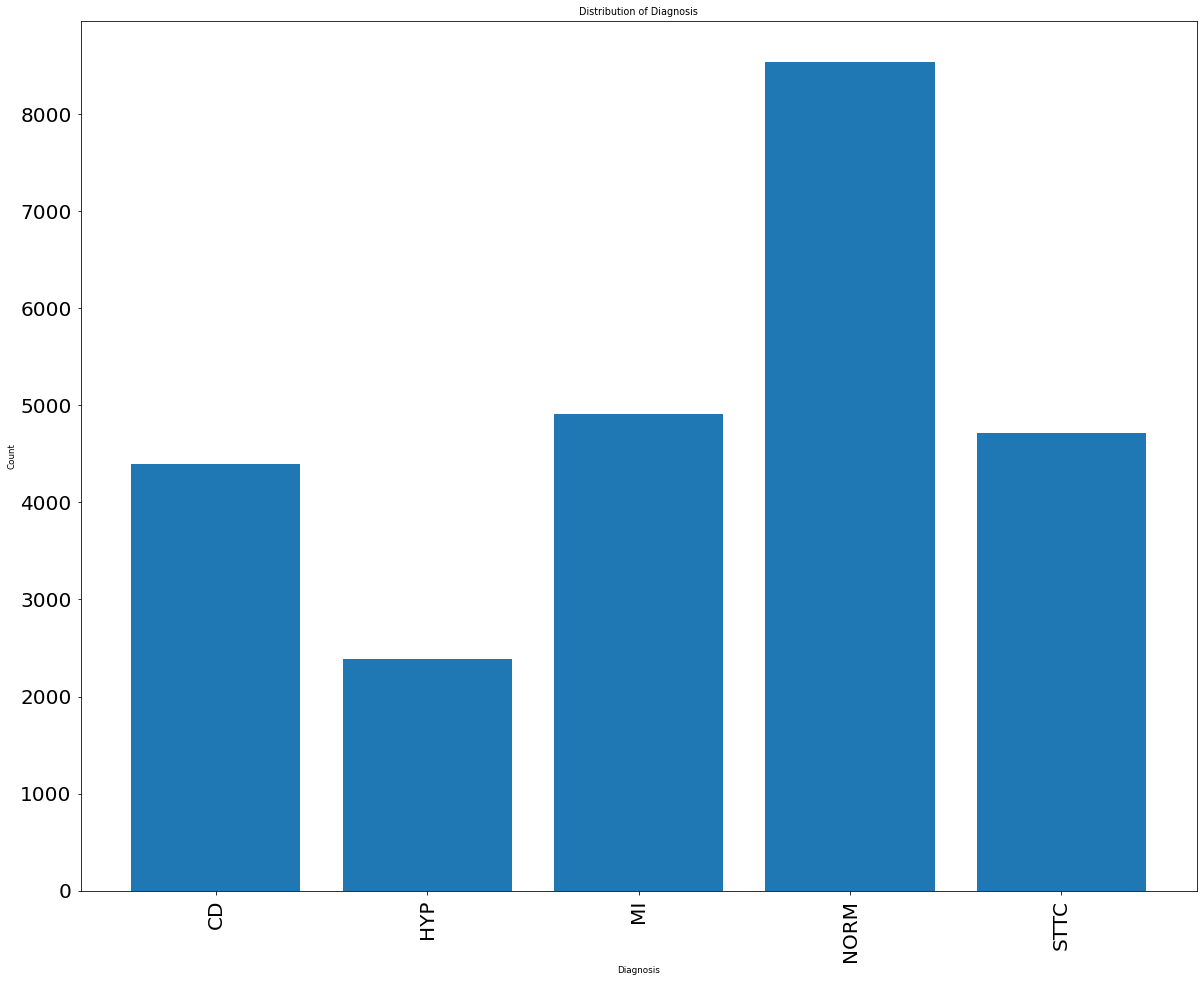

In [ ]:
def plot_classes(classes,y_ohe,plot_name = "myplot"):
  plt.style.use('seaborn-paper')
  plt.figure(figsize=(20,16))
  plt.bar(x=classes,height=y_ohe.sum(axis=0))
  plt.title("Distribution of Diagnosis", color = "black")
  plt.tick_params(axis="both", colors = "black")
  plt.xlabel("Diagnosis", color = "black")
  plt.ylabel("Count", color = "black")
  plt.xticks(rotation=90, fontsize=20)
  plt.yticks(fontsize = 20)
  plt.savefig(plot_name + ".png")
  plt.show()

plot_classes(one_hot.classes_[1:],y_train_ohe)

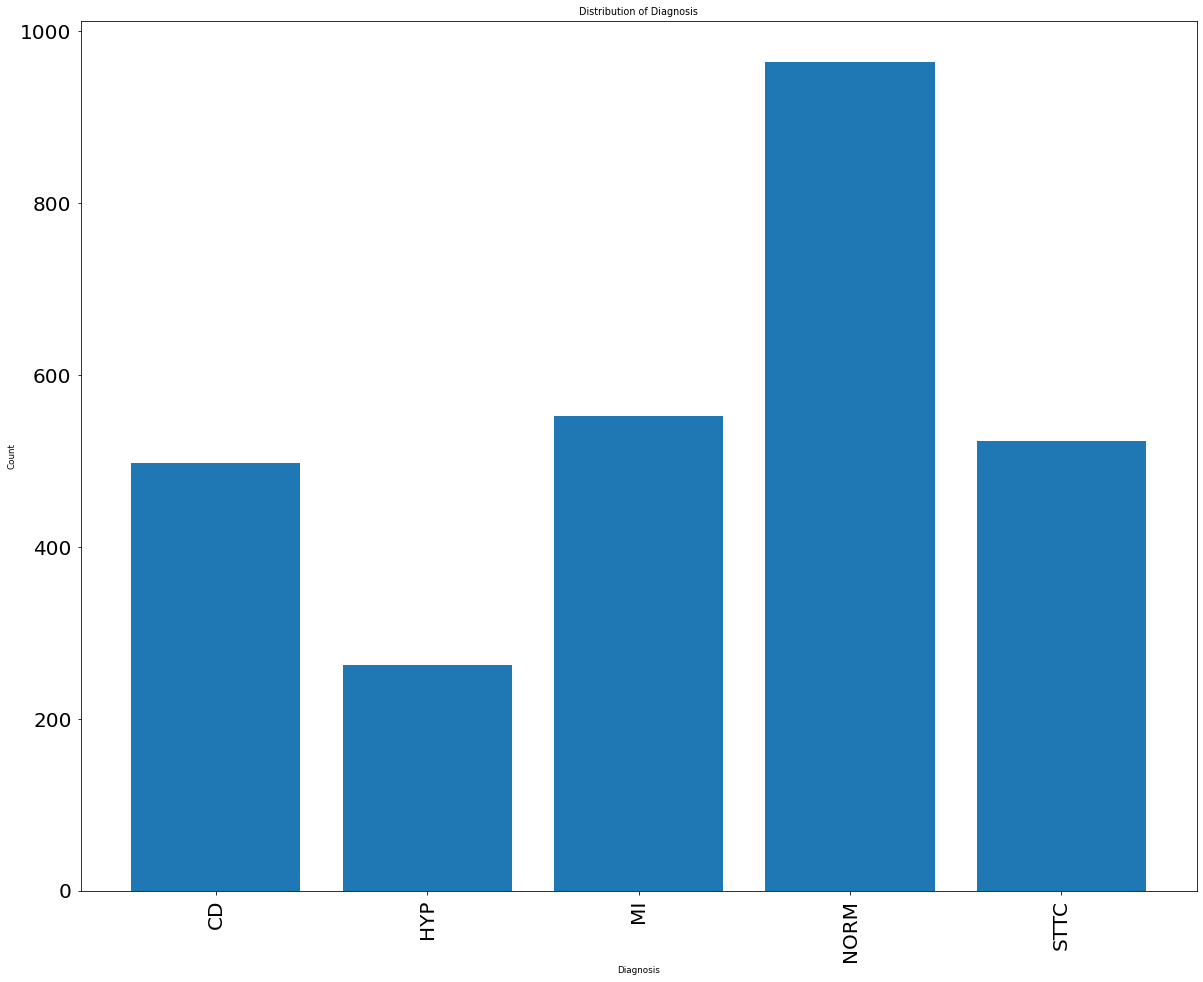

In [ ]:
plot_classes(one_hot.classes_[1:],y_test_ohe)

In [ ]:
#@title Transform our One Hot encoded multilabel output to a new type of label where all can be represented by a number:
from sklearn.preprocessing import LabelEncoder
def get_new_labels(y):
    y_new = LabelEncoder().fit_transform([''.join(str(l)) for l in y])
    return y_new

In [ ]:
y_train_ = get_new_labels(y_train_ohe)
print("Total number of unique combinations of diagnosis: {}".format(len(np.unique(y_train_))))

Total number of unique combinations of diagnosis: 22


In [ ]:
y_test_ = get_new_labels(y_test_ohe)
print("Total number of unique combinations of diagnosis: {}".format(len(np.unique(y_test_))))

Total number of unique combinations of diagnosis: 20


In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = list(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(y_train_ohe,y_train_))
print("Training split: {}".format(len(folds[0][0])))
print("Validation split: {}".format(len(folds[0][1])))

Training split: 17607
Validation split: 1957


In [ ]:
def mlp_clf(input_dim, output_dim, lr = 0.01, activation_l="relu"):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_dim=input_dim, activation=activation_l))
    model.add(tf.keras.layers.Dense(100, activation=activation_l))
    model.add(tf.keras.layers.Dense(100, activation=activation_l))
    model.add(tf.keras.layers.Dense(100, activation=activation_l))
    model.add(tf.keras.layers.Dense(100, activation=activation_l))
    model.add(tf.keras.layers.Dense(100, activation=activation_l))
    model.add(tf.keras.layers.Dense(100, activation=activation_l))
    model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

    model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate = lr), metrics=["accuracy","AUC"])

    return model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
model = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(200,200,200,200,200), verbose=1, max_iter=10, batch_size=100, learning_rate='adaptive', activation='relu',learning_rate_init=0.0001)

In [ ]:
from scipy import optimize
#init_threshold = np.ones(24)*0.100
def thr_acc_metrics(thr, label, output_prob):
    return -compute_accuracy(label, np.array(output_prob>thr))

In [ ]:
def compute_accuracy(labels, outputs):
    num_recordings, num_classes = np.shape(labels)

    num_correct_recordings = 0
    for i in range(num_recordings):
        if np.all(labels[i, :]==outputs[i, :]):
            num_correct_recordings += 1

    return float(num_correct_recordings) / float(num_recordings)

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 61kB 2.2MB/s 


In [ ]:
1e-10

1e-10

In [ ]:
import kerastuner
from kerastuner import HyperModel
import tensorflow as tf
from tensorflow.keras import regularizers


class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes



    def build(self, hp):

      model = tf.keras.Sequential()
      model.add(tf.keras.layers.Dense(units=hp.Int('unit_0', 50, 500, step=50, default=100), input_dim=112,activation=hp.Choice('act_0', values=['relu', 'elu', 'selu'], default='relu')))
      for i in range(hp.Int('number_of_layers',1,10,step=1, default=5)):
        model.add(tf.keras.layers.Dense(units=hp.Int('unit_{}'.format(i+1), 50, 500, step=50, default=100), activation=hp.Choice('act_{}'.format(i+1), values=['relu', 'elu', 'selu'], default='relu')))

      model.add(tf.keras.layers.Dense(5, activation='sigmoid'))
      model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate = hp.Choice('learning_rate', values=[0.00001, 0.0001, 0.001, 0.01, 0.1], default=0.001)), metrics=["accuracy","AUC"])
      return model



In [ ]:
class MyTuner(kerastuner.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 10, 100, step=10)
    kwargs['epochs'] = trial.hyperparameters.Int('epochs', 10, 100, step=10)
    super(MyTuner, self).run_trial(trial, *args, **kwargs)

In [ ]:
from kerastuner.tuners import BayesianOptimization

NUM_CLASSES = one_hot.classes_[1:]
INPUT_SHAPE = 112  
SEED = 42
MAX_TRIALS = 50
EXECUTION_PER_TRIAL = 3

hypermodel = HyperModel(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

tuner = MyTuner(
    hypermodel,
    objective='val_accuracy',
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='drive/My Drive/logs/fysstk_oblig',
    project_name='ECGopt11',
)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
tuner.search(X_train_scaled[folds[0][1]],y_train_ohe[folds[0][1]], validation_split=0.2, verbose=1,)

Epoch 1/10
157/157 [==============================] - 1s 5ms/step - loss: 0.6828 - accuracy: 0.2192 - auc: 0.4568 - val_loss: 0.6841 - val_accuracy: 0.2245 - val_auc: 0.4736
Epoch 2/10
157/157 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.2198 - auc: 0.4577 - val_loss: 0.6837 - val_accuracy: 0.2245 - val_auc: 0.4745
Epoch 3/10
157/157 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.2204 - auc: 0.4584 - val_loss: 0.6832 - val_accuracy: 0.2245 - val_auc: 0.4747
Epoch 4/10
157/157 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.2217 - auc: 0.4591 - val_loss: 0.6828 - val_accuracy: 0.2245 - val_auc: 0.4748
Epoch 5/10
157/157 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.2224 - auc: 0.4596 - val_loss: 0.6824 - val_accuracy: 0.2194 - val_auc: 0.4749
Epoch 6/10
157/157 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.2224 - auc: 0.4608 - val_loss: 0.68

Epoch 1/40
18/18 [==============================] - 0s 26ms/step - loss: 0.7349 - accuracy: 0.3687 - auc: 0.6064 - val_loss: 0.7476 - val_accuracy: 0.3010 - val_auc: 0.5508
Epoch 2/40
18/18 [==============================] - 0s 9ms/step - loss: 0.7348 - accuracy: 0.3687 - auc: 0.6063 - val_loss: 0.7475 - val_accuracy: 0.3010 - val_auc: 0.5509
Epoch 3/40
18/18 [==============================] - 0s 9ms/step - loss: 0.7347 - accuracy: 0.3687 - auc: 0.6064 - val_loss: 0.7474 - val_accuracy: 0.3010 - val_auc: 0.5509
Epoch 4/40
18/18 [==============================] - 0s 9ms/step - loss: 0.7346 - accuracy: 0.3687 - auc: 0.6066 - val_loss: 0.7473 - val_accuracy: 0.3010 - val_auc: 0.5509
Epoch 5/40
18/18 [==============================] - 0s 9ms/step - loss: 0.7345 - accuracy: 0.3687 - auc: 0.6066 - val_loss: 0.7472 - val_accuracy: 0.3010 - val_auc: 0.5509
Epoch 6/40
18/18 [==============================] - 0s 9ms/step - loss: 0.7344 - accuracy: 0.3693 - auc: 0.6067 - val_loss: 0.7471 - val_ac

Epoch 1/70
32/32 [==============================] - 0s 13ms/step - loss: 0.6872 - accuracy: 0.1444 - auc: 0.4856 - val_loss: 0.6498 - val_accuracy: 0.1811 - val_auc: 0.5218
Epoch 2/70
32/32 [==============================] - 0s 5ms/step - loss: 0.6111 - accuracy: 0.2256 - auc: 0.5592 - val_loss: 0.6172 - val_accuracy: 0.1888 - val_auc: 0.5418
Epoch 3/70
32/32 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.3188 - auc: 0.5968 - val_loss: 0.6046 - val_accuracy: 0.2577 - val_auc: 0.5527
Epoch 4/70
32/32 [==============================] - 0s 5ms/step - loss: 0.5630 - accuracy: 0.3827 - auc: 0.6169 - val_loss: 0.5994 - val_accuracy: 0.2959 - val_auc: 0.5596
Epoch 5/70
32/32 [==============================] - 0s 5ms/step - loss: 0.5545 - accuracy: 0.4045 - auc: 0.6273 - val_loss: 0.5973 - val_accuracy: 0.3112 - val_auc: 0.5640
Epoch 6/70
32/32 [==============================] - 0s 5ms/step - loss: 0.5492 - accuracy: 0.4153 - auc: 0.6346 - val_loss: 0.5966 - val_ac

Epoch 1/100
16/16 [==============================] - 1s 38ms/step - loss: 0.6170 - accuracy: 0.3604 - auc: 0.5890 - val_loss: 0.5730 - val_accuracy: 0.3393 - val_auc: 0.5965
Epoch 2/100
16/16 [==============================] - 0s 16ms/step - loss: 0.5345 - accuracy: 0.4371 - auc: 0.6487 - val_loss: 0.5840 - val_accuracy: 0.3393 - val_auc: 0.5934
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 0.5318 - accuracy: 0.4371 - auc: 0.6577 - val_loss: 0.5799 - val_accuracy: 0.3393 - val_auc: 0.5908
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 0.5300 - accuracy: 0.4371 - auc: 0.6643 - val_loss: 0.5800 - val_accuracy: 0.3393 - val_auc: 0.5983
Epoch 5/100
16/16 [==============================] - 0s 18ms/step - loss: 0.5280 - accuracy: 0.4371 - auc: 0.6723 - val_loss: 0.5762 - val_accuracy: 0.3393 - val_auc: 0.5978
Epoch 6/100
16/16 [==============================] - 0s 16ms/step - loss: 0.5266 - accuracy: 0.4371 - auc: 0.6765 - val_loss: 0.58

Epoch 1/100
157/157 [==============================] - 2s 16ms/step - loss: 0.7329 - accuracy: 0.3470 - auc: 0.6009 - val_loss: 0.5923 - val_accuracy: 0.3393 - val_auc: 0.5624
Epoch 2/100
157/157 [==============================] - 2s 13ms/step - loss: 0.5386 - accuracy: 0.4000 - auc: 0.6557 - val_loss: 0.6340 - val_accuracy: 0.2551 - val_auc: 0.5312
Epoch 3/100
157/157 [==============================] - 2s 14ms/step - loss: 0.5228 - accuracy: 0.4243 - auc: 0.6898 - val_loss: 0.6119 - val_accuracy: 0.3189 - val_auc: 0.5569
Epoch 4/100
157/157 [==============================] - 2s 13ms/step - loss: 0.5068 - accuracy: 0.4192 - auc: 0.7182 - val_loss: 0.7078 - val_accuracy: 0.1378 - val_auc: 0.5341
Epoch 5/100
157/157 [==============================] - 2s 13ms/step - loss: 0.4925 - accuracy: 0.4690 - auc: 0.7440 - val_loss: 0.6440 - val_accuracy: 0.2194 - val_auc: 0.5874
Epoch 6/100
157/157 [==============================] - 2s 13ms/step - loss: 0.4729 - accuracy: 0.4709 - auc: 0.7733 - va

Epoch 1/100
16/16 [==============================] - 0s 25ms/step - loss: 0.6586 - accuracy: 0.2901 - auc: 0.5458 - val_loss: 0.6342 - val_accuracy: 0.2985 - val_auc: 0.5261
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5793 - accuracy: 0.3955 - auc: 0.6158 - val_loss: 0.6046 - val_accuracy: 0.3163 - val_auc: 0.5517
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5522 - accuracy: 0.4192 - auc: 0.6325 - val_loss: 0.5917 - val_accuracy: 0.3418 - val_auc: 0.5629
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5404 - accuracy: 0.4268 - auc: 0.6491 - val_loss: 0.5924 - val_accuracy: 0.3418 - val_auc: 0.5631
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5351 - accuracy: 0.4243 - auc: 0.6583 - val_loss: 0.5901 - val_accuracy: 0.3367 - val_auc: 0.5647
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5324 - accuracy: 0.4319 - auc: 0.6616 - val_loss: 0.5893 -

Epoch 1/10
16/16 [==============================] - 0s 23ms/step - loss: 0.6689 - accuracy: 0.2658 - auc: 0.5338 - val_loss: 0.6366 - val_accuracy: 0.2857 - val_auc: 0.5433
Epoch 2/10
16/16 [==============================] - 0s 7ms/step - loss: 0.5879 - accuracy: 0.3661 - auc: 0.6079 - val_loss: 0.6037 - val_accuracy: 0.3189 - val_auc: 0.5576
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5562 - accuracy: 0.4064 - auc: 0.6361 - val_loss: 0.5926 - val_accuracy: 0.3189 - val_auc: 0.5627
Epoch 4/10
16/16 [==============================] - 0s 7ms/step - loss: 0.5419 - accuracy: 0.4224 - auc: 0.6516 - val_loss: 0.5894 - val_accuracy: 0.3214 - val_auc: 0.5659
Epoch 5/10
16/16 [==============================] - 0s 9ms/step - loss: 0.5351 - accuracy: 0.4236 - auc: 0.6614 - val_loss: 0.5844 - val_accuracy: 0.3291 - val_auc: 0.5784
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5323 - accuracy: 0.4313 - auc: 0.6647 - val_loss: 0.5836 - val_ac

Epoch 1/100
16/16 [==============================] - 0s 21ms/step - loss: 0.6193 - accuracy: 0.3252 - auc: 0.5808 - val_loss: 0.5983 - val_accuracy: 0.3444 - val_auc: 0.5611
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.4230 - auc: 0.6335 - val_loss: 0.5922 - val_accuracy: 0.3393 - val_auc: 0.5682
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5410 - accuracy: 0.4319 - auc: 0.6457 - val_loss: 0.5917 - val_accuracy: 0.3367 - val_auc: 0.5742
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.4351 - auc: 0.6517 - val_loss: 0.5914 - val_accuracy: 0.3367 - val_auc: 0.5761
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5345 - accuracy: 0.4364 - auc: 0.6566 - val_loss: 0.5893 - val_accuracy: 0.3418 - val_auc: 0.5792
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.4377 - auc: 0.6625 - val_loss: 0.5909 - 

Epoch 1/100
16/16 [==============================] - 0s 21ms/step - loss: 0.6807 - accuracy: 0.2377 - auc: 0.5206 - val_loss: 0.6385 - val_accuracy: 0.2500 - val_auc: 0.5317
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5921 - accuracy: 0.3412 - auc: 0.6001 - val_loss: 0.6018 - val_accuracy: 0.3061 - val_auc: 0.5577
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5583 - accuracy: 0.3968 - auc: 0.6343 - val_loss: 0.5879 - val_accuracy: 0.3393 - val_auc: 0.5719
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5441 - accuracy: 0.4173 - auc: 0.6470 - val_loss: 0.5846 - val_accuracy: 0.3469 - val_auc: 0.5770
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5355 - accuracy: 0.4319 - auc: 0.6581 - val_loss: 0.5886 - val_accuracy: 0.3393 - val_auc: 0.5729
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5326 - accuracy: 0.4307 - auc: 0.6608 - val_loss: 0.5884 - 

Epoch 1/100
16/16 [==============================] - 0s 21ms/step - loss: 0.7680 - accuracy: 0.1821 - auc: 0.4977 - val_loss: 0.7488 - val_accuracy: 0.2117 - val_auc: 0.5240
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7680 - accuracy: 0.1821 - auc: 0.4977 - val_loss: 0.7488 - val_accuracy: 0.2117 - val_auc: 0.5240
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7679 - accuracy: 0.1827 - auc: 0.4977 - val_loss: 0.7487 - val_accuracy: 0.2117 - val_auc: 0.5240
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7679 - accuracy: 0.1827 - auc: 0.4978 - val_loss: 0.7487 - val_accuracy: 0.2117 - val_auc: 0.5240
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7678 - accuracy: 0.1827 - auc: 0.4978 - val_loss: 0.7487 - val_accuracy: 0.2117 - val_auc: 0.5240
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7678 - accuracy: 0.1827 - auc: 0.4978 - val_loss: 0.7486 - 

Epoch 1/100
157/157 [==============================] - 1s 6ms/step - loss: 0.5416 - accuracy: 0.4300 - auc: 0.6371 - val_loss: 0.6140 - val_accuracy: 0.3393 - val_auc: 0.5801
Epoch 2/100
157/157 [==============================] - 1s 4ms/step - loss: 0.5338 - accuracy: 0.4371 - auc: 0.6493 - val_loss: 0.5720 - val_accuracy: 0.3393 - val_auc: 0.5917
Epoch 3/100
157/157 [==============================] - 1s 4ms/step - loss: 0.5297 - accuracy: 0.4371 - auc: 0.6610 - val_loss: 0.6077 - val_accuracy: 0.3393 - val_auc: 0.5841
Epoch 4/100
157/157 [==============================] - 1s 4ms/step - loss: 0.5284 - accuracy: 0.4358 - auc: 0.6696 - val_loss: 0.5809 - val_accuracy: 0.3393 - val_auc: 0.6012
Epoch 5/100
157/157 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.4351 - auc: 0.6726 - val_loss: 0.5921 - val_accuracy: 0.3393 - val_auc: 0.5828
Epoch 6/100
157/157 [==============================] - 1s 4ms/step - loss: 0.5208 - accuracy: 0.4313 - auc: 0.6836 - val_loss

In [ ]:
   # Show a summary of the search
tuner.results_summary()

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
#results = best_model.evaluate(X_combined_test_gridsearch, y_test_gridsearch)

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
print(best_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                5650      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               25500     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2505      
Total params: 33,655
Trainable params: 33,655
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
best_model.fit()

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.1>

In [ ]:
#rom sklearn.metrics import fbeta_score
#from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

test_res = np.zeros(shape=(10,5))
training_res = np.zeros(shape=(10,5))


for train_index, val_index in folds:
  y_cv_train = y_train_ohe[train_index]
  X_cv_train = X_train.iloc[train_index]
  y_cv_val = y_train_ohe[val_index]
  X_cv_val = X_train.iloc[val_index]

  scaler = StandardScaler()
  scaler.fit(X_cv_train)
  X_cv_train = scaler.transform(X_cv_train)
  X_cv_val = scaler.transform(X_cv_val)
  best_model = tuner.get_best_models(num_models=1)[0]
  best_model.fit(X_cv_train,y_cv_train,epochs=100, batch_size=100, validation_data=(X_cv_val,y_cv_val))
  #model = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(100,100,100,100), verbose=1, max_iter=10, batch_size=100, learning_rate='adaptive', activation='relu',learning_rate_init=0.0001)
  #model.fit(X_cv_train,y_cv_train)
  Train_pred = model.predict(X_cv_train)

  highscore = 0
  best_thr = 0
  score_temp = 0
  for i in range(100):
    k= i*0.01*np.ones(5)
    score_temp = compute_accuracy(y_cv_train, Train_pred>k)
    if score_temp > highscore:
      highscore = score_temp
      best_thr = k
  print("best threshold:", best_thr)
  best_thr = optimize.fmin(thr_acc_metrics, args=(y_cv_train,Train_pred), x0=best_thr)
  print("best threshold:", best_thr)

  Val_pred = model.predict(X_cv_val)
  Val_pred = (Val_pred > best_thr) * 1
  print("Accuracy validation data:",compute_accuracy(y_cv_val, Val_pred))
  X_test_scaled = scaler.transform(X_test)
  Test_pred = model.predict(X_test_scaled)
  Test_pred = (Test_pred > best_thr) * 1
  print("Accuracy test data:",compute_accuracy(y_test_ohe, Test_pred))



Epoch 1/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5498 - accuracy: 0.3983 - auc: 0.6309 - val_loss: 0.5374 - val_accuracy: 0.4001 - val_auc: 0.6633
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5454 - accuracy: 0.4041 - auc: 0.6363 - val_loss: 0.5440 - val_accuracy: 0.3950 - val_auc: 0.6465
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.4068 - auc: 0.6397 - val_loss: 0.5396 - val_accuracy: 0.3996 - val_auc: 0.6546
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5428 - accuracy: 0.4088 - auc: 0.6413 - val_loss: 0.5447 - val_accuracy: 0.3531 - val_auc: 0.6441
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5420 - accuracy: 0.4081 - auc: 0.6430 - val_loss: 0.5407 - val_accuracy: 0.4073 - val_auc: 0.6509
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5417 - accuracy: 0.4098 - auc: 0.6437 - val_loss

In [ ]:
model = mlp_clf(112,5)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
#model = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(100,100,100,100), verbose=1, max_iter=10, batch_size=30, learning_rate='adaptive', activation='relu',learning_rate_init=0.0001)
#model.fit(X_train_scaled,y_train_ohe)
model.fit(X_train_scaled,y_train_ohe,epochs=36, batch_size=30, validation_data=(X_test_scaled,y_test_ohe))

Epoch 1/36
653/653 [==============================] - 2s 2ms/step - loss: 0.5770 - accuracy: 0.3988 - auc: 0.5928 - val_loss: 0.5497 - val_accuracy: 0.4163 - val_auc: 0.6340
Epoch 2/36
653/653 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.4173 - auc: 0.6323 - val_loss: 0.5423 - val_accuracy: 0.4163 - val_auc: 0.6535
Epoch 3/36
653/653 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.4173 - auc: 0.6349 - val_loss: 0.5392 - val_accuracy: 0.4163 - val_auc: 0.6598
Epoch 4/36
653/653 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.4173 - auc: 0.6365 - val_loss: 0.5373 - val_accuracy: 0.4163 - val_auc: 0.6678
Epoch 5/36
653/653 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.4172 - auc: 0.6383 - val_loss: 0.5358 - val_accuracy: 0.4163 - val_auc: 0.6723
Epoch 6/36
653/653 [==============================] - 1s 2ms/step - loss: 0.5424 - accuracy: 0.4171 - auc: 0.6394 - val_loss: 0.53

In [ ]:
y_train_pred = model.predict(X_train_scaled)
highscore = 0
best_thr = 0
score_temp = 0
k=0
for i in range(100):
  k= i*0.01*np.ones(5)
  score_temp = compute_accuracy(y_train_ohe, y_train_pred>k)
  if score_temp > highscore:
    highscore = score_temp
    best_thr = k
print("best threshold:", best_thr)
new_best_thr = optimize.fmin(thr_acc_metrics, args=(y_train_ohe,y_train_pred), x0=best_thr)
print("best threshold:", new_best_thr)

best threshold: [0.33 0.33 0.33 0.33 0.33]
Optimization terminated successfully.
         Current function value: -0.416173
         Iterations: 32
         Function evaluations: 99
best threshold: [0.36294259 0.32424667 0.389395   0.22155697 0.37779083]


In [ ]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred>best_thr)*1

In [ ]:
compute_accuracy(y_test_ohe,y_pred)

0.4148887880163413

In [ ]:
def compute_modified_confusion_matrix_nonorm(labels, outputs):
    # Compute a binary multi-class, multi-label confusion matrix, where the rows
    # are the labels and the columns are the outputs.
    num_recordings, num_classes = np.shape(labels)
    A = np.zeros((num_classes, num_classes))

    # Iterate over all of the recordings.
    for i in range(num_recordings):
        # Calculate the number of positive labels and/or outputs.
        #####normalization = float(max(np.sum(np.any((labels[i, :], outputs[i, :]), axis=0)), 1))
        # Iterate over all of the classes.
        for j in range(num_classes):
            # Assign full and/or partial credit for each positive class.
            if labels[i, j]:
                for k in range(num_classes):
                    if outputs[i, k]:
                        A[j, k] += 1.0#/normalization

    return A

In [ ]:
conf_matrix = compute_modified_confusion_matrix_nonorm(y_test_ohe,y_pred)

In [ ]:
conf_matrix_df = pd.DataFrame(conf_matrix)

In [ ]:
conf_matrix_df.index = one_hot.classes_[1:]
conf_matrix_df.columns = one_hot.classes_[1:]

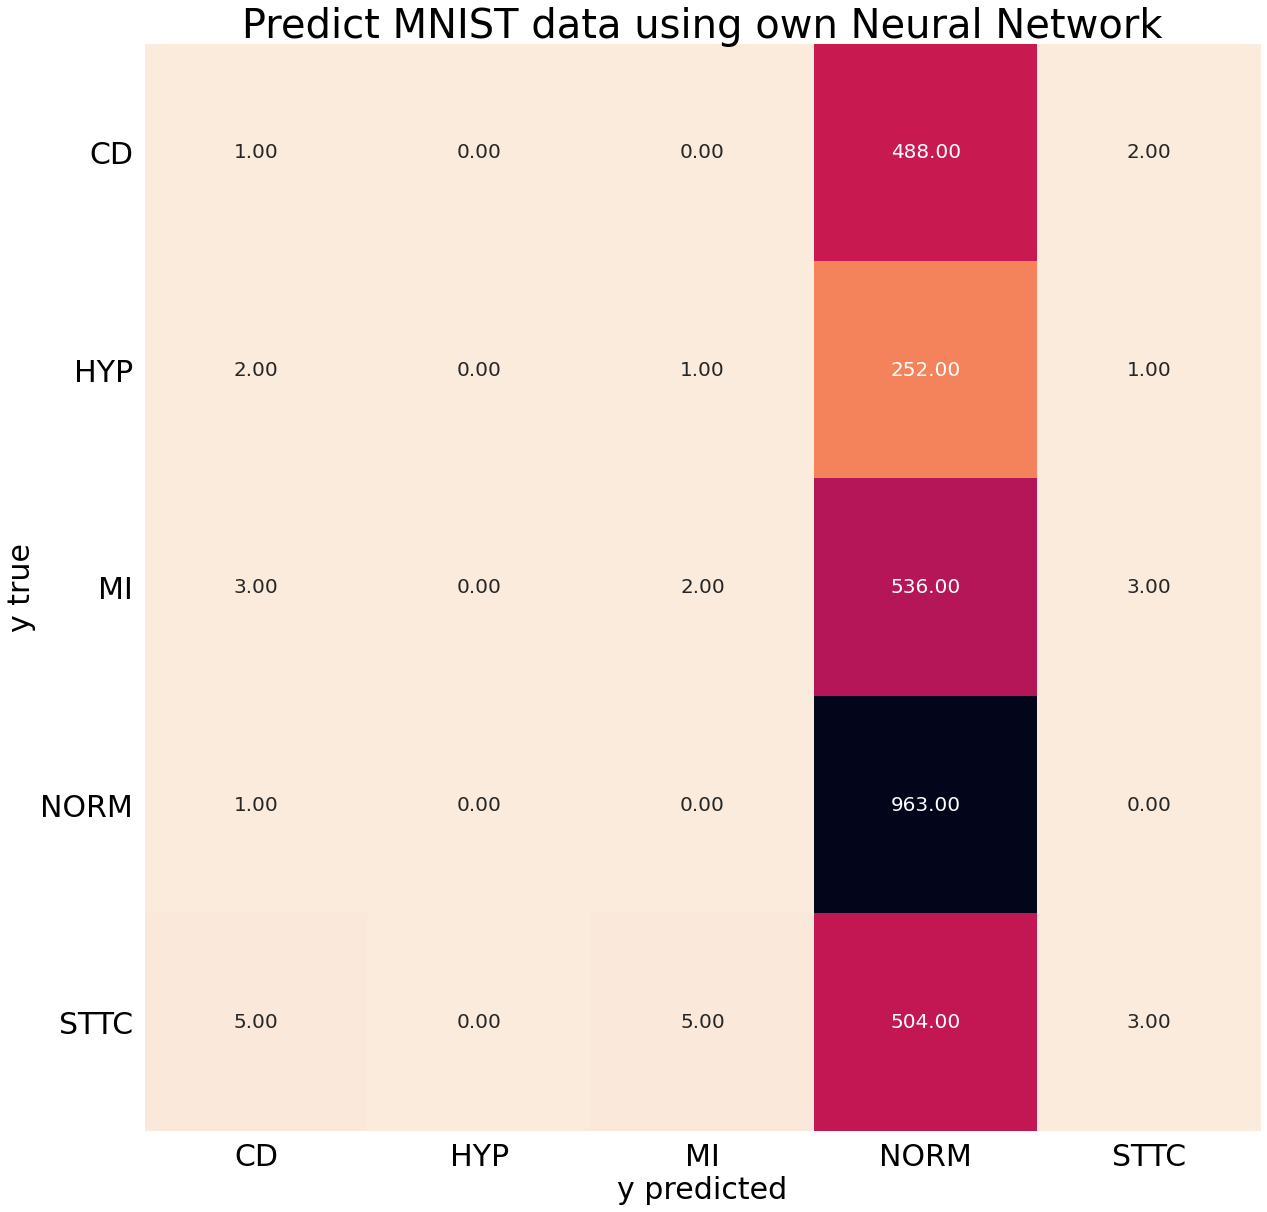

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix_df, cmap="rocket_r", annot=True,annot_kws={"size": 20}, fmt=".2f", cbar=False)
plt.title("Predict MNIST data using own Neural Network", fontsize = 40, color= "black")
plt.xlabel("y predicted",fontsize=30, color= "black")
plt.ylabel("y true",fontsize = 30, color= "black")
plt.yticks(fontsize=30, rotation=0, color= "black")
plt.xticks(fontsize=30, rotation=0, color= "black")
#plt.savefig("Results/MNIST_confMatrix_ownNN.png",dpi=100)
plt.show()